## Product Rating Prediction

# Table Of Content

- [q1. The problem. What is the input? What is the output?](#q1)
- [q2. What data mining function is required?](#q2)
- [q3 .What could be the challenges?](#q3)
- [q4.  What is the impact?](#q4)
- [q5. What is an ideal solution?](#q5)
- [q6. Why Data Mining is a misnomer? What is another preferred name?](#q6)
- [q7. What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?](#q7)
- [q8. In data mining, what is the difference between prediction and categorization?](#q8)
- [q9. Why data science/machine learning is a bad idea in the context of information security?](#q9)
- [q10. What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?](#q10)
- [1. Taking a look at the data](#look)
- [2. Feature Engineering](#Feature)
    - [2.1 Chi Squre Test and correlation](#correlation)
    - [2.2 Feature Selection](#selection)
    - [2.3 Feature Extraction](#extraction)
    - [2.4 Important Conclusion In Feature Engineering](#fc)
    - [2.5 Handling missing and incorrect values](#missing)
    
- [3. which model should be tried?](#which)
- [4. Modelling](#modelling)
    - [4.1 Random Forest no.1](#forest1)
    - [4.2 Decision Tree no.1](#decision1)
    - [4.3 SVC no.1](#svc1)
    - [4.4 naive bayes no.1](#naive1)
    - [4.5 Random Forest no.2](#forest2)
    - [4.6 Decision Tree no.2](#decision2)
    - [4.7 SVC no.2](#svc2)
    - [4.8 naive bayes no.2](#naive2)
    - [4.9 Random Forest no.3](#forest3)
    - [4.10 Decision Tree no.3](#decision3)
    - [4.11 SVC no.3](#svc3)
    - [4.12 naive bayes no.3](#naive3)
    - [4.9 Random Forest no.4](#forest4)
    - [4.10 Decision Tree no.4](#decision4)
    - [4.11 SVC no.4](#svc4)
    - [4.12 naive bayes no.4](#naive4)
- [5. Conclusion](#con)
- [6.References](#ref)

<a id='q1'></a>
## q1. The problem? What is the input? What is the output?

- The problem is to predict the product ratings of Wish.com products. The input is some observations of the made ratings of products such as price, product color, country, merchant name and so on. The output is product rating from 1 to 5. The goal is to predict how likely people will like a product and give a high rate.


<a id='q2'></a>
## q2. What data mining function is required?

- Hence the rating which the target variable is a categoral variable so the data mining function is classification.

<a id='q3'></a>
## q3 .What could be the challenges?

- The challenges could be irrelevan features, noisy data, incorrect values, missing values. the features may not be enough for the model to get better result and the data not enough to get confidence result.


<a id='q4'></a>
## q4. What is the impact?

- figuring out what makes some products get high rating
- figuring out what are most features that impact product rating
- understanding customer perferences
- predicting if some products will get a low or high ratings so they gonna sort it on the website based on that

<a id='q5'></a>
## q5. What is an ideal solution?

- the solution may be to check which features have the highest impact on the product rating then handle them checking their missing, incorrect or irrelevant values and trying to solve them then do machine learning model with those features  

<a id='q6'></a>
## q6. Why Data Mining is a misnomer? What is another preferred name?

- The term "data mining" is a misnomer because the goal is the extraction of patterns and knowledge from large amounts of data, not the extraction (mining) of data itself. another preferred name is knowledge discovery in data

<a id='q7'></a>
## q7. What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?

0 The knowledge discovery process, also called knowledge discovery in databases, seeks new knowledge in some application domain. It is defined as the nontrivial process of identifying valid, novel, potentially useful, and ultimately understandable patterns in data.

## What is the difference between a data engineer and data scientist/AI engineer?

- Data engineer: is someone who develops, constructs, tests and maintains architectures, such as databases and large-scale processing systems. The data scientist, on the other hand, is someone who cleans, massages, and organizes big data.
- Data scientist: will usually already get data that has passed a first round of cleaning and manipulation, which they can use to feed to sophisticated analytics programs and machine learning and statistical methods to prepare data for use in predictive and prescriptive modeling.

<a id='q8'></a>
## q8. In data mining, what is the difference between prediction and categorization?

- Categorization: is the process of finding a good model that describes the data classes or concepts, and the purpose of classification is to predict the class of objects whose class label is unknown.

- Prediction: is like something that may go to happen in the future. And just like that in prediction, we identify or predict the missing or unavailable data for a new observation based on the previous data that we have and based on the future assumptions. In prediction, the output is a continuous value.

<a id='q9'></a>
## q9. Why data science/machine learning is a bad idea in the context of information security?

- Existing security data may be considered sensitive material, so teams might have to get creative when finding data to train machine learning algorithms.

## q10. What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

- The CIA principle is a security model that stands for Confidentiality, Integrity, and Availability. It is used to guide security measures, controls, and overall strategy.

- When it comes to AI systems/pipelines, privacy is an important aspect that needs to be considered. The principles of trustworthy AI like transparency and explainability, fairness and non-discrimination, human oversight, robustness and security of data processing can regularly be related to specific individual rights and provisions of corresponding privacy laws.

In [183]:
# importing labarieries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
df = pd.read_csv('train_new.csv') # reading the training data

<a id='look'></a>
## 1. Taking a look at the data and its columns values

In [185]:
df[df['rating'] == 6] # getting records have rating 6

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
971,49.0,42,EUR,100,0,6.0,6,1,0,0,...,yanfenglivingmuseum,"90 % avis positifs (29,977 notes)",29977,4.223138,5925555b2cd9447854443c41,0,NaN,summer,2020-08,118


- we can see that there is only one record that has rate 6 so we gonna drop it

In [186]:
# df['merchant_rating'] = df['merchant_rating'].apply(np.floor)
df = df[df['rating'] < 6] # removing records which have rate 6

In [187]:
df.info() # showing dataframe info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1093 non-null   float64
 1   retail_price                  1093 non-null   int64  
 2   currency_buyer                1093 non-null   object 
 3   units_sold                    1093 non-null   int64  
 4   uses_ad_boosts                1093 non-null   int64  
 5   rating                        1093 non-null   float64
 6   rating_count                  1093 non-null   int64  
 7   badges_count                  1093 non-null   int64  
 8   badge_local_product           1093 non-null   int64  
 9   badge_product_quality         1093 non-null   int64  
 10  badge_fast_shipping           1093 non-null   int64  
 11  tags                          1093 non-null   object 
 12  product_color                 1064 non-null   object 
 13  pro

In [188]:
# printing unique values of all columns
for column in df.columns:
    print(column + ': ')
    print(df[column].unique()[:20]) # print first 20 unqiue values in each column
    print('--------------------------------------------')
    print('\n\n')

price: 
[ 8.    6.    4.67 14.    3.67  9.   19.   12.    5.74 13.   11.   18.
  5.    2.   15.    3.    5.91  1.72  7.    3.81]
--------------------------------------------



retail_price: 
[ 7 34  4 11 51  9  8 21  5 10 16 15  6 38  2 13  3 87 17 26]
--------------------------------------------



currency_buyer: 
['EUR']
--------------------------------------------



units_sold: 
[ 10000   1000    100   5000     50  20000     10      8  50000      2
      7      1 100000]
--------------------------------------------



uses_ad_boosts: 
[1 0]
--------------------------------------------



rating: 
[4. 3. 5. 2. 1.]
--------------------------------------------



rating_count: 
[1670  843   10   82  127   36  510    6  761 1561   50 2366 4378 3648
  477   55  506    2   81    4]
--------------------------------------------



badges_count: 
[0 1 2 3]
--------------------------------------------



badge_local_product: 
[0 1]
--------------------------------------------



badge_prod

In [189]:
df['crawl_month'].unique() # printing unique values of `crawl_month` column

array(['2020-08'], dtype=object)

- Contains only one value

In [190]:
df['currency_buyer'].unique() # printing unique values of `currency_buyer` column

array(['EUR'], dtype=object)

- Contains only one value

In [191]:
df['shipping_option_name'].unique() # printing unique values of `shipping_option_name` column

array(['Livraison standard', 'Standard Shipping', 'الشحن القياسي',
       'Expediere Standard', 'Envío normal', 'Standardowa wysyłka',
       'Envio Padrão', 'Standardversand', 'Spedizione standard',
       'Standart Gönderi', 'Livraison Express', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
       'Стандартная доставка'], dtype=object)

- They are all refer to the same meaning but translated to other languages

In [192]:
df[df['product_variation_size_id'] == 'choose a size'] # print the record has "choose a size" as a value in the `product_variation_size_id` column

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
46,6.0,56,EUR,1000,1,3.0,938,0,0,0,...,nalininternational,"(13,309 notes)",13309,3.8767,55c89dc93a698c6010edccc4,0,NaN,summer,2020-08,461


<a id='Feature'></a>
## 2. Feature Engineering
### 2.1 Chi Squre test and Correlation
<a id='correlation'></a>

In [193]:
for column in df.columns:
    if len(df[column].unique()) > 10:
        continue
    # Cross tabulation between each feature and rating
    CrosstabResult=pd.crosstab(index=df[column],columns=df['rating'])
    print(CrosstabResult)

    # importing the required function
    from scipy.stats import chi2_contingency

    # Performing Chi-sq test
    ChiSqResult = chi2_contingency(CrosstabResult)

    # P-Value is the Probability of H0 being True
    # If P-Value&gt;0.05 then only we Accept the assumption(H0)
    
    print('The P-Value of the Column: {} in ChiSq Test is:'.format(column), ChiSqResult[1])
    print('-----------------------------------------------')
    print('\n\n')
    # reference: https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/

rating          1.0  2.0  3.0  4.0  5.0
currency_buyer                         
EUR               2   12  135  774  170
The P-Value of the Column: currency_buyer in ChiSq Test is: 1.0
-----------------------------------------------



rating          1.0  2.0  3.0  4.0  5.0
uses_ad_boosts                         
0                 0    8   73  433  106
1                 2    4   62  341   64
The P-Value of the Column: uses_ad_boosts in ChiSq Test is: 0.20848873358063458
-----------------------------------------------



rating  1.0  2.0  3.0  4.0  5.0
rating                         
1.0       2    0    0    0    0
2.0       0   12    0    0    0
3.0       0    0  135    0    0
4.0       0    0    0  774    0
5.0       0    0    0    0  170
The P-Value of the Column: rating in ChiSq Test is: 0.0
-----------------------------------------------



rating        1.0  2.0  3.0  4.0  5.0
badges_count                         
0               2   12  132  716  117
1               0    0    0  

Text(0.5, 1.0, 'Figure[1]')

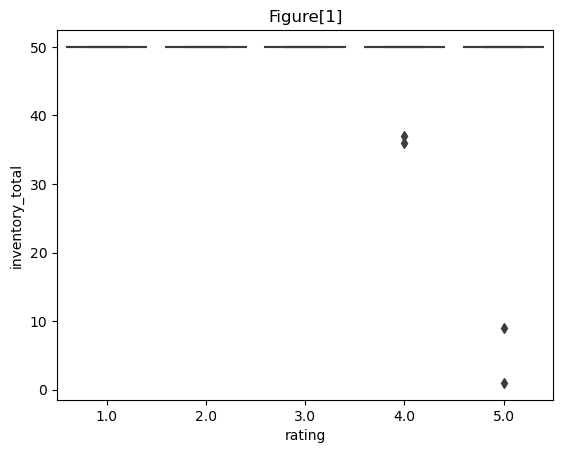

In [194]:
sns.boxplot(x=df.rating, y=df.inventory_total) # ploting box plot to check the corrleation between `rating` and `inventroy_total`
plt.title('Figure[1]')

In [195]:
df[['inventory_total', 'rating']].corr() # checking the corrleation between `rating` and `inventroy_total`

,inventory_total,rating
inventory_total,1.000000,-0.069752
rating,-0.069752,1.000000


In [196]:
df.groupby(by=["rating"], dropna=False).mean()['inventory_total'] # checking the corrleation between `rating` and `inventroy_total`

rating
1.0    50.000000
2.0    50.000000
3.0    50.000000
4.0    49.965116
5.0    49.470588
Name: inventory_total, dtype: float64

In [197]:
df.groupby(by=["rating"], dropna=False).mean()['countries_shipped_to'] # checking the corrleation between `rating` and `countries_shipped_to`

rating
1.0    44.000000
2.0    40.666667
3.0    38.837037
4.0    40.604651
5.0    41.188235
Name: countries_shipped_to, dtype: float64

In [198]:
df[['countries_shipped_to', 'rating']].corr() # checking the corrleation between `rating` and `countries_shipped_to`

,countries_shipped_to,rating
countries_shipped_to,1.000000,0.024617
rating,0.024617,1.000000


In [199]:
df[['shipping_option_price', 'rating']].corr() # checking the corrleation between `rating` and `shipping_option_price`

,shipping_option_price,rating
shipping_option_price,1.00000,0.18211
rating,0.18211,1.00000


In [200]:
df[['product_variation_inventory', 'rating']].corr() # checking the corrleation between `rating` and `product_variation_inventory`

,product_variation_inventory,rating
product_variation_inventory,1.000000,0.053252
rating,0.053252,1.000000


In [201]:
df.groupby(by=["rating"], dropna=False).mean()['product_variation_inventory'] # checking the corrleation between `rating` and `product_variation_inventory`

rating
1.0    20.000000
2.0    30.333333
3.0    28.029630
4.0    33.821705
5.0    32.488235
Name: product_variation_inventory, dtype: float64

In [202]:
df[['rating_count', 'rating']].corr() # checking the corrleation between `rating` and `product_variation_inventory`

,rating_count,rating
rating_count,1.000000,0.026881
rating,0.026881,1.000000


In [203]:
df.groupby(by=["rating"], dropna=False).mean()['rating_count'] # checking the corrleation between `rating` and `product_variation_inventory`

rating
1.0       1.000000
2.0       2.666667
3.0     305.000000
4.0    1136.521964
5.0     474.705882
Name: rating_count, dtype: float64

Text(0.5, 1.0, 'Figure[2]')

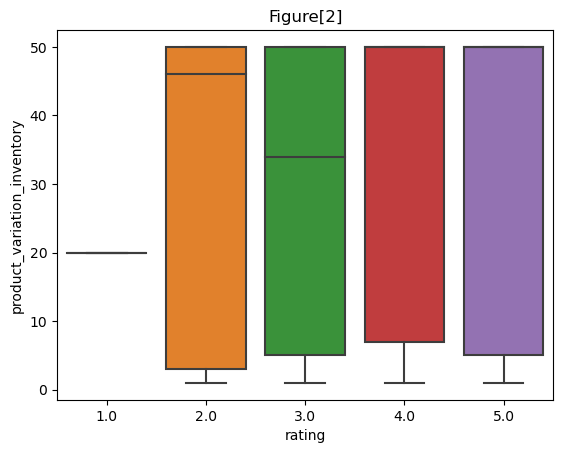

In [204]:
sns.boxplot(x=df.rating, y=df.product_variation_inventory) # ploting box plot to check the corrleation between `rating` and `product_variation_inventory`
plt.title('Figure[2]')

In [205]:
df[['badge_product_quality', 'rating']].corr() # checking the corrleation between `rating` and `badge_product_quality`

,badge_product_quality,rating
badge_product_quality,1.000000,0.276168
rating,0.276168,1.000000


<a id='selection'></a>
##    2.2 Feature Selection
----------------------------
- we have non relavent rating which is 6 that may be a data entry error so we gonna drop this row
- the are some columns that seems not realted to product info like marchant info and we will try to prove that there is no relation using statstical methods
- `merchant_profile_picture`, `urgency_text` <font color ='green'>and `has_urgency_banner` contains 745 null values and sounds not related to rating and hard to fill so we may drop thoses except for one column which is `has_urgency_banner` we can fill null by zero and try because I expect that null values refers to products which has no urgency banner and after filling the null values we will come back and checj the correlation </font>
- `crawl_month` and `theme` conatins only one unique value so it will not effect the rating
- `merchant_has_profile_picture` a flag column that indicate if the merchant has a profile picture or not so it seems not relevant and we can see that the <b>p-value</b> using chisq test shows that there is no relation between this feature and the rating so we gonna drop it
- `merchant_id` it is just a unique number that define the merchant so it has nothing to do with our problem so we gonna drop it
- `merchant_info_subtitle` this column shows the percentage and number of feedbacks notes of customers for that mercahant and it is a text column that needs more manipulation to extract the data from it and there is other feature which is `merchant_rating` that almost gives the same information so we gonna drop `merchant_info_subtitle`
- `merchant_name` and `merchant_title` it is just a merchant name and merchant_title which has nothing to do with our problem as it has no effect on product rating
    <a id='p2'></a>
- <font color='green'> `origin_country` may effect the rating as the <b>p-value = 2.3e10-18</b> which shows that there is a high corellation between the rating column and origin_country but as we can see there is a shortage in data for countries other than <b>CN</b> so the p-value may not be accurate but we will take this feature in our consideration and try the model with and without it and see what will happen. another thing to take in our consideration is this column has 12 null values so, we gonna drop thoses rows </font>
- `inventory_total` as we can see in the figure [1] and in the cells below there is no correlation between `inventory_total` and `rating` feature as the avgerages do not change when ratings change so we gonna drop it 
- `countries_shipped_to` by checking correlation coffecient and calculating averages group by rating it seems there is no correlation with our target so we gonna drop it
- `shipping_is_express` the <b>p-value=0.26</b> which shows weak correlation with `rating` so we gonna drop it
- <font color='green'>`shipping_option_price` the <b>p-value=1.14e-06</b> which show moderate correlation with `rating` so we gonna keep this feature and take it in our consideration </font>
- `shipping_option_name` After translating the values inside this column I found that all refers to the same thing but translated into different langauges so it will not effect our target column so we gonna drop it.
- `product_variation_inventory` the correlation coffecient between this feature and rating is close to zero which indicates weak relation between those two variables and figure[2] support that saying, so we gonna drop it.
- `tags` we gonna drop the tags column as it has no relation with rating a product. we can consider this from the business perspective.
- `badge_fast_shipping` the <b>p-value=0.22</b> which shows weak correlation between `badge_fast_shipping` and `rating` so we gonna drop it.
-<font color='green'> `badge_product_quality` the <b>p-value=4.55e-24</b> which shows strong correlation between `badge_product_quality` and `rating` so we gonna take it in our consideration </font>
- `currency_buyer` conatins only one unique value so it will not effect the rating so we gonaa drop it

<a id='extraction'></a>
## 2.3 Feature Extraction (recommended):
--------------------------
- `product_variation_size_id` contains corrupted and duplicated values so we gonna handdle it and check the correlation again. and I if I had more data of products I would try to create another column that count different sizes for each product as it might replace this categorical feature with other simple feature and avoid incorrect entries like color or pice instead of size and void one hot incoding and flood of feature. Then I have an assumption which says that if the product have different varity of sizes it might increase the rating so I will see if there is a correlation or not after creating this feature.
- `product_color` this column has the same issue as the `product_variation_size_id` column so if I had more data for the product I would count `product_color` by product to to create new feature that indicates the varity of colors for each product and drop the `product_color` then check the correlation
<a id='fc'></a>    
## 2.4 Conclusion in Feature Engineering:
---------------------------------------
- After doing all of them feature by feature and checking its correlation with target variable I realized I'm doing it indvidually but may be there is a correlation between two combined feature and target variable so this may not work and will lead to bad accuracy and bad f1-score so I need an algorithm that can take the correlation between combined feature in its consideration and I think the decision tree or random forest can do this as it uses information gain or entropy and try different combination of feature, And I gonna use selected features which have strong correlation with target variable then use all features with random forest and other algorithms to prove the point.

In [206]:
df_p1 = df.copy()
df_p1.drop(['merchant_profile_picture', 'urgency_text', 'currency_buyer', 'merchant_name', 'merchant_title', 'crawl_month', 'theme', 'merchant_profile_picture', 'merchant_id', 'shipping_option_name', 'merchant_info_subtitle', 'tags', 'id'], axis=1, inplace=True)
df_p1['has_urgency_banner'].fillna(0, inplace=True)


<a id=missing></a>
## 2.5 Missing and Duplicated Values

## Handling Duplication, incorrect values: 
##### 2.4.1  `product_variation_size_id` column: 

In [207]:
df_p1['product_variation_size_id'].unique() # print unique values of `product_variation_size_id` column

array(['M', 'L', 'XS', 'S', 'XL', '26(Waist 72cm 28inch)', 'S.',
       'S(bust 88cm)', 'XXS', 's', '29', nan, 'choose a size', 'XXXS',
       'Base Coat', 'Size M', 'XXL', 'M.', 'XS.',
       '100 x 100cm(39.3 x 39.3inch)', '2pcs', '4XL', '1', '25-S',
       'Size-XXS', '5PAIRS', '35', 'Pack of 1', 'Size S', 'Size-S', '6XL',
       '25', 'S/M(child)', '60', 'Size-XS', 'S (waist58-62cm)',
       'SIZE XXS', '10 ml', 'X   L', 'Women Size 36', '04-3XL',
       'Size -XXS', '1 pc.', 'Floating Chair for Kid', 'S Pink', '34',
       'US-S', 'Size XXS', 'pants-S', 'XXXXL', 'SIZE-XXS', 'SIZE XS',
       '1pc', 'Size S.', '100 cm', 'S..', 'Round', '4-5 Years', '5', '33',
       '30 cm', '2', 'XXXXXL', '20PCS-10PAIRS', '2XL', 'Size-5XL',
       'Size4XL', 'One Size', 'size S', 'Size/S', 'B', 'SizeL', '20pcs',
       '1 PC - XL', 'Suit-S', 'Base & Top & Matte Top Coat',
       'Baby Float Boat', '1m by 3m', 'SIZE S', 'White', '40 cm', '5XL',
       '10pcs', 'H01'], dtype=object)

In [208]:
df_p1[df_p1['product_variation_size_id'] == 'choose a size'] # print the record that has `product_variation_size_id` = 'choose a size'

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
46,6.0,56,1000,1,3.0,938,0,0,0,0,...,1,2,0,28,50,0.0,CN,13309,3.8767,0


In [209]:
# this function maps the duplicated values to one correct value
def rename_size_values(x):
    if x in ('S.', 's', 'S..', 'size S', 'Size/S', 'Suit-S', 'SIZE S', 'S Pink', 'S (waist58-62cm)', 'S(bust 88cm)'):
        return 'S'
    elif x in ('XS.', 'Size-XS'):
        return 'XS'
    elif x in ('Size M', 'M.'):
        return 'M'
    elif x == 'SizeL':
        return 'L'
    elif x in ('1 PC - XL', 'X   L'):
        return 'XL'
    elif x in ('Size-XXS', 'SIZE XXS', 'Size -XXS', 'Size -XXS', 'Size XXS', 'SIZE-XXS'):
        return 'XXS'
    else:
        return x

##### 2.4.2 `product_color` column: 

In [210]:
df_p1['product_color'].unique() # print unique values of `product_color` column

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
       'armygreen', 'lightblue', nan, 'coffee', 'grey', 'skyblue',
       'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
       'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
       'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
       'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentg

In [211]:
# this function maps the duplicated values to one correct value
def rename_color_values(x):
    if x == 'black':
        return 'Black'
    elif x == 'white':
        return 'White'
    elif x in ('Size M', 'M.'):
        return 'M'
    elif x == 'light green':
        return 'lightgreen'
    elif x == 'pink':
        return 'Pink'
    elif x == 'RED':
        return 'red'
    elif x == 'blue & pink':
        return 'pink & blue'
    elif x == 'blue':
        return 'Blue'
    else: 
        return x

In [212]:
df_p1['product_variation_size_id'] = df_p1['product_variation_size_id'].apply(rename_size_values) # applying the function to correct values in the column
#df_p1['product_color'] = df_p1['product_color'].apply(rename_color_values) # applying the function to correct values in the column

In [213]:
len(df_p1['product_variation_size_id'].unique()) # count unique values in `product_variation_size_id` after handling values

62

In [214]:
df_p1['product_color'] = df_p1['product_color'].apply(rename_color_values) # applying the function to correct values in the column

<a id='p1'></a>
<br>
<br>


- After hadling some of incorrect values I found there are some values that I can not corrected and I can not predict its correct value so I will try the model with and without those two feature `product_variation_size_id` and `product_color`

In [215]:
df_p1.fillna(method='ffill', inplace=True) # filling null values by previous value

In [216]:
df_p1.info() # priting columns after droping some of them and handling incorrect values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1093
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1093 non-null   float64
 1   retail_price                  1093 non-null   int64  
 2   units_sold                    1093 non-null   int64  
 3   uses_ad_boosts                1093 non-null   int64  
 4   rating                        1093 non-null   float64
 5   rating_count                  1093 non-null   int64  
 6   badges_count                  1093 non-null   int64  
 7   badge_local_product           1093 non-null   int64  
 8   badge_product_quality         1093 non-null   int64  
 9   badge_fast_shipping           1093 non-null   int64  
 10  product_color                 1093 non-null   object 
 11  product_variation_size_id     1093 non-null   object 
 12  product_variation_inventory   1093 non-null   int64  
 13  shi

- These columns are selected columns that we gonna use and permutate some of them with different models

<a id='which'></a>
# 3. which model should be tried?

- After doing all of them feature by feature and checking its correlation with target variable I realized I'm doing it indvidually but may be there is a correlation between two combined feature and target variable so this may not work and will lead to bad accuracy and bad f1-score so I need an algorithm that can take the correlation between combined feature in its consideration and I think the decision tree or random forest can do this as it uses information gain or entropy and try different combination of feature, And I gonna use selected features which have strong correlation with target variable then use all features with random forest and other algorithms to prove the point.

<a id='modelling'></a>
# 4. Modelling


<a id='forest1'></a>
## 4.1. Random Forest no.1

- The First model below is without `product_color` and `product_variation_size_id` columns. Why without those two feature? check the point [Here](#p1)


In [217]:
# here we put data preprocessing steps in one function to make things easier
def data_preprocessing_1(data):
    # droping irrelevant features
    data = data.drop(['merchant_profile_picture', 'urgency_text', 'currency_buyer', 'merchant_name', 'merchant_title', 'crawl_month', 'theme', 'merchant_profile_picture', 'merchant_id', 'shipping_option_name', 'merchant_info_subtitle', 'tags', 'id'], axis=1)
    # drop coulmns which have issues
    data = data.drop(['product_color', 'product_variation_size_id'], axis=1) # drop the two columns
    data['merchant_rating'] = np.round(data['merchant_rating'], decimals = 3) # round to the thired decimal place
    data['price'] = np.round(data['price'], decimals = 3) # round to the thired decimal place
    data['retail_price'] = np.round(data['retail_price'], decimals = 3) # round to the thired decimal place
    data['has_urgency_banner'] = data['has_urgency_banner'].fillna(0) # filling null values by 0
    data = data.fillna(method='ffill') # fill other missing values by prvious one.
#     print(test_data['origin_country'].unique())
#     data = pd.get_dummies(data, prefix=['origin_country'])
    return data

In [218]:
# data_model1 = data_preprocessing_1(df) # calling the data_preprocessing_1 function.

In [219]:
data_model1 = data_preprocessing_1(df) # calling the data_preprocessing_1 function.
# data_model1['merchant_rating'] = data_model1['merchant_rating'].apply(np.ceil)
y = data_model1['rating'] # get the target column
test_data_ori = pd.read_csv('test_new.csv') # reading the test data
test_data = data_preprocessing_1(test_data_ori) # calling the preprocessing for the test data
data_model1 = pd.get_dummies(data_model1, prefix=['origin_country']) # one-hot encoding for categorical columns in trainning
test_model1 = pd.get_dummies(test_data, prefix=['origin_country']) # one-hot encoding for categorical columns in testing
data_model1, test_model1 = data_model1.align(test_model1, join='inner', axis=1)  # inner join to match hot-encoded columns in test with tran
X = data_model1 # get the x feature to tran the model. the target column already removed as we have done inner join in the previous line.
# y = data_model1['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y) # spliting data into train and test

In [228]:

# the lines of code below do the grid search to choose the best parameters for the model.

param_grid = {'n_estimators': [800,900,1000,1100,1200,1300,1400,1500],
              'max_depth': [8,9,16,17,18,19,20,21,22,23],
              'bootstrap': [True, False],
              'criterion': ['gini']}


f1 = make_scorer(f1_score , average='macro') # define the score the we gonna use.

rf = RandomForestClassifier(random_state=42) # define the model

rf_model = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring=f1,refit=True) #define the grid search
model1 = rf_model.fit(X, y) # fiting the grid search

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [229]:
model1.best_score_ # print the best socre model get

0.6742598451895787

- The best socre model get is 67%

In [232]:
model1.best_params_ # print the best paramters model gets

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'n_estimators': 800}

In [233]:
y_p = model1.predict(X) # predict the target to use in confusion matrix
report = classification_report(y, y_p) # define the confusion matrix 
print(report) # print the confusion matrix

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         2
         2.0       0.92      1.00      0.96        12
         3.0       1.00      0.99      1.00       135
         4.0       1.00      1.00      1.00       774
         5.0       1.00      0.99      1.00       170

    accuracy                           1.00      1093
   macro avg       0.98      1.00      0.99      1093
weighted avg       1.00      1.00      1.00      1093



In [236]:
# final = test_model1.copy()
# rate = model1.predict(test_model1)
# final['rating'] = rate

In [237]:
# final['id'] = test_data_ori['id']
# final[['id', 'rating']].to_csv('finalV7.csv', index=False)

In [238]:
# pd.read_csv('finalV7.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      479 non-null    int64  
 1   rating  479 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.6 KB


In [239]:
report = classification_report(y, y_p)
print(report)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         2
         2.0       0.92      1.00      0.96        12
         3.0       1.00      0.99      1.00       135
         4.0       1.00      1.00      1.00       774
         5.0       1.00      0.99      1.00       170

    accuracy                           1.00      1093
   macro avg       0.98      1.00      0.99      1093
weighted avg       1.00      1.00      1.00      1093



<a id='decision1'></a>
## 4.2 Decision Tree no.1

- without `product_color` and `product_variation_size_id` columns. Why without those two feature? check the point [Here](#p1)

In [241]:
decision_tree = DecisionTreeClassifier() # define the decision tree
# parameters to be tried
tree_para = {'criterion':['gini','entropy'],'max_depth':[7,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,30,40,50,70,90,120,150]}
decision_tree_model1 = GridSearchCV(decision_tree, tree_para, cv=5, refit=True, scoring=f1) # define the grid search
decision_tree_model1.fit(X,y) # fitting the grid search
print('Best Score: ', decision_tree_model1.best_score_) # print the best socre model get
print('\n')
print('Best Parameters: ', decision_tree_model1.best_params_) # print the best paramters model gets

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Score:  0.6194116169964936


Best Parameters:  {'criterion': 'gini', 'max_depth': 17}


<a id='svc1'></a>
## 4.3 SVC no.1

- without product_color and product_variation_size_id columns. Why without those two feature? check the point Here

In [246]:
svc = SVC() # loding the model
# define the range of parameters
paramters = {
    'kernel': ['poly','rbf'],
    'degree': np.arange(1,4),
    'C': np.arange(1,4),
}
f1 = make_scorer(f1_score , average='macro') # define the metric
GS_SVC = GridSearchCV(svc, param_grid = paramters, refit = True, cv=4, scoring = f1, return_train_score= True) # define the grid search
SVC_model = GS_SVC.fit(X, y) # fiting the grid
print('Best Score: ', SVC_model.best_score_) # print the best socre model get
print('\n')
print('Best Parameters: ', SVC_model.best_params_) # print the best paramters model gets

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


Best Score:  0.1866559489239856


Best Parameters:  {'C': 2, 'degree': 3, 'kernel': 'poly'}


<a id='naive1'></a>
## 4.4 Naive Bayes no.1

- without product_color and product_variation_size_id columns. Why without those two feature? check the point Here


In [247]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)
y_p = model.predict(X_test) # model prediction

report = classification_report(y_test, y_p) # confusion matrix
print(report) # printing the confusion matrix

              precision    recall  f1-score   support

         2.0       0.05      1.00      0.10         2
         3.0       0.11      0.25      0.16        20
         4.0       0.81      0.54      0.65       116
         5.0       0.50      0.04      0.07        26

    accuracy                           0.43       164
   macro avg       0.37      0.46      0.24       164
weighted avg       0.67      0.43      0.49       164



<a id='forest2'></a>
## 4.5 Random Forest no.2

- The second model below is without `origin_country`, `product_variation_size_id` and `origin_country` column. Why droping `origin_country`? check the point [here](#p2)

In [248]:
# here we put data preprocessing steps in one function to make things easier
def data_preprocessing_2(data):
     # droping irrelevant features
    data = data.drop(['merchant_profile_picture', 'urgency_text', 'currency_buyer', 'merchant_name', 'merchant_title', 'crawl_month', 'theme', 'merchant_profile_picture', 'merchant_id', 'shipping_option_name', 'merchant_info_subtitle', 'tags', 'id'], axis=1)
    # drop coulmns which have issues
    data = data.drop(['product_color', 'product_variation_size_id', 'origin_country'], axis=1) # drop columns
#     data['merchant_rating'] = data['merchant_rating'].apply(np.ceil)
    data['merchant_rating'] = np.round(data['merchant_rating'], decimals = 3) # round to the thired decimal place
    data['price'] = np.round(data['price'], decimals = 3) # round to the thired decimal place
    data['retail_price'] = np.round(data['retail_price'], decimals = 3) # round to the thired decimal place
    data['has_urgency_banner'].fillna(0, inplace=True)   # filling null values by 0
    data = data.fillna(method='ffill') # fill other missing values by prvious one.
    return data # return the preprocessed data

In [249]:
data_model1 = data_preprocessing_2(df) # calling the data_preprocessing_2 function for training data.
y = data_model1['rating'] # get the target column
test_data_ori = pd.read_csv('test_new.csv') # read the test data
test_data = data_preprocessing_2(test_data_ori) # data_preprocessing_2 for testing data
data_model1, test_model1 = data_model1.align(test_model1, join='inner', axis=1)  # inner join to match hot-encoded columns in test with train
X = data_model1 # get the feature without the target column
# y = data_model1['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y) # split the data into train and test

In [250]:
# the lines of code below do the grid search to choose the best parameters for the model.
param_grid = {'n_estimators': [600,700,800,900,1000],
              'max_depth': [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
              'bootstrap': [True, False],
              'criterion': ['gini']}

f1 = make_scorer(f1_score , average='macro') # define the score the we gonna use.

rf2 = RandomForestClassifier(random_state=42) # define the model

rf_model2 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, n_jobs=-1, scoring=f1,refit=True) #define the grid search
model2 = rf_model2.fit(X, y) # fiting the grid search

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


In [251]:
model2.best_params_ # print the best paramters model gets

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 15, 'n_estimators': 800}

In [252]:
model2.best_score_ # print the best socre model get

0.648573581832226

<a id='decision2'></a>
## 4.6 Decision Tree no.2

- The second model below is without `origin_country`, `product_variation_size_id` and `origin_country` column. Why droping `origin_country`? check the point [here](#p2)

In [253]:
decision_tree = DecisionTreeClassifier() # define the decision tree
# parameters to be tried
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,30,40,50,70,90,120,150],
             'min_samples_split':list(range(1,10)),
             'min_samples_leaf':list(range(1,10))
            }
decision_tree_model1 = GridSearchCV(decision_tree, tree_para, cv=5, refit=True, scoring=f1) # define the grid search
decision_tree_model1.fit(X,y) # fitting the grid search
print('Best Score: ', decision_tree_model1.best_score_) # print the best socre model get
print('\n')
print('Best Parameters: ', decision_tree_model1.best_params_) # print the best paramters model gets

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Score:  0.6363959669405763


Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2430 fits failed out of a total of 21870.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float

<a id='svc2'></a>
## 4.7 SVC no.2


- The second model below is without `origin_country`, `product_variation_size_id` and `origin_country` column. Why droping `origin_country`? check the point [here](#p2)

In [254]:
svc = SVC() # loding the model
# define the range of parameters
paramters = {
    'kernel': ['poly','rbf'],
    'degree': np.arange(1,4),
    'C': np.arange(1,3),
}
f1 = make_scorer(f1_score , average='macro') # define the metric
GS_SVC = GridSearchCV(svc, param_grid = paramters, refit = True, cv=4, scoring = f1, return_train_score= True) # define the grid search
SVC_model = GS_SVC.fit(X, y) # fiting the grid
print('Best Score: ', SVC_model.best_score_) # print the best socre model get
print('\n')
print('Best Parameters: ', SVC_model.best_params_) # print the best paramters model gets

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


Best Score:  0.1866559489239856


Best Parameters:  {'C': 1, 'degree': 3, 'kernel': 'poly'}


<a id='naive2'></a>

## 4.8 Naive Bayes no.2

- The second model below is without `origin_country`, `product_variation_size_id` and `origin_country` column. Why droping `origin_country`? check the point [here](#p2)

In [255]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)
y_p = model.predict(X_test) # model prediction

report = classification_report(y_test, y_p) # confusion matrix
print(report) # printing the confusion matrix

              precision    recall  f1-score   support

         2.0       0.08      1.00      0.15         2
         3.0       0.14      0.55      0.23        20
         4.0       0.82      0.41      0.54       116
         5.0       0.00      0.00      0.00        26

    accuracy                           0.37       164
   macro avg       0.26      0.49      0.23       164
weighted avg       0.60      0.37      0.41       164



<a id='forest3'></a>
## 4.9 Random Forest no.3

- the third model below uses all columns

In [258]:
# here we put data preprocessing steps in one function to make things easier
def data_preprocessing_3(data):
    data = data.drop(['merchant_profile_picture', 'urgency_text', 'currency_buyer', 'merchant_name', 'merchant_title', 'crawl_month', 'theme', 'merchant_profile_picture', 'merchant_id', 'shipping_option_name', 'merchant_info_subtitle', 'tags', 'id'], axis=1)
    data['product_variation_size_id'] = data['product_variation_size_id'].apply(rename_size_values) # applying the function to correct values in the column
    data['product_color'] = data['product_color'].apply(rename_color_values) # applying the function to correct values in the column
#     data = data.drop(['product_color', 'product_variation_size_id', 'origin_country'], axis=1)
#     data['merchant_rating'] = data['merchant_rating'].apply(np.ceil)
    data['merchant_rating'] = np.round(data['merchant_rating'], decimals = 3)  # round to the thired decimal place
    data['price'] = np.round(data['price'], decimals = 3)  # round to the thired decimal place
    data['retail_price'] = np.round(data['retail_price'], decimals = 3)  # round to the thired decimal place
    data['has_urgency_banner'].fillna(0, inplace=True) # filling null values by 0
    data = data.fillna(method='ffill') # fill other missing values by prvious one.
    return data # return cleaned data

In [259]:
data_model3 = data_preprocessing_3(df) # call the data_preprocessing_3 function with training data
# data_model1['merchant_rating'] = data_model1['merchant_rating'].apply(np.ceil)
y = data_model3['rating'] # get the target column
test_data_ori = pd.read_csv('test_new.csv') # read the test data set
test_data = data_preprocessing_3(test_data_ori) # call the data_preprocessing_3 with test data.
data_model3 = pd.get_dummies(data_model3, prefix=['origin_country', 'product_variation_size_id', 'product_color']) # one-hot encoding 
test_model1 = pd.get_dummies(test_data, prefix=['origin_country', 'product_variation_size_id', 'product_color'])  # one-hot encoding
data_model3, test_model1 = data_model1.align(test_model1, join='inner', axis=1)  # inner join to match hot-encoded columns in test with tran
X = data_model1 # get the feature without the target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y) # split the data into train and test

In [260]:
# data_model3 = df_p1.copy()

In [261]:
# data_model3 = pd.get_dummies(data_model3, prefix=['origin_country', 'product_variation_size_id', 'product_color'])

In [262]:
# data_model3 = df_p1.copy()
# data_model3 = pd.get_dummies(data_model3, prefix=['origin_country', 'product_variation_size_id', 'product_color'])
# X = data_model3.drop('rating', axis=1)
# y = data_model3['rating']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

In [263]:

param_grid = {'n_estimators': [700,800,900,1000, 1500 ,2000],
              'max_depth': [10,12,13,16,17,18,20,30,40],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}


f1 = make_scorer(f1_score , average='macro') # define the score the we gonna use.

rf3 = RandomForestClassifier(random_state=42) # define the model

rf_model3 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, n_jobs=-1, scoring=f1,refit=True) #define the grid search
model3 = rf_model3.fit(X, y) # fiting the grid search

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


In [264]:
model2.best_params_ # print the best paramters model gets

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 15, 'n_estimators': 800}

In [265]:
model2.best_score_ # print the best socre model get

0.648573581832226

<a id='decision3'></a>
## 4.10 Decision Tree no.3

- the third decision tree below uses all columns

In [266]:
decision_tree = DecisionTreeClassifier() # define the decision tree
# parameters to be tried
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,30,40,50,70,90,120,150],
            }
decision_tree_model1 = GridSearchCV(decision_tree, tree_para, cv=5, refit=True, scoring=f1) # define the grid search
decision_tree_model1.fit(X,y) # fitting the grid search
print('Best Score: ', decision_tree_model1.best_score_) # print the best socre model get
print('\n')
print('Best Parameters: ', decision_tree_model1.best_params_) # print the best paramters model gets

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Score:  0.641236383033392


Best Parameters:  {'criterion': 'gini', 'max_depth': 9}


<a id='svc3'></a>
## 4.11 SVC no.3

- the third SVC below uses all columns

In [267]:
svc = SVC() # loding the model
# define the range of parameters
paramters = {
    'kernel': ['poly','rbf'],
    'degree': np.arange(1,5),
    'C': np.arange(1,3),
}
f1 = make_scorer(f1_score , average='macro') # define the metric
GS_SVC = GridSearchCV(svc, param_grid = paramters, refit = True, cv=4, scoring = f1, return_train_score= True) # define the grid search
SVC_model = GS_SVC.fit(X, y) # fiting the grid
print('Best Score: ', SVC_model.best_score_) # print the best socre model get
print('\n')
print('Best Parameters: ', SVC_model.best_params_) # print the best paramters model gets

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


Best Score:  0.1866559489239856


Best Parameters:  {'C': 1, 'degree': 3, 'kernel': 'poly'}


<a id='naive3'></a>
## 4.12 Naive Bayes no.3

- The third Naive Bayes below uses all columns

In [268]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)
y_p = model.predict(X_test) # model prediction

report = classification_report(y_test, y_p) # confusion matrix
print(report) # printing the confusion matrix

              precision    recall  f1-score   support

         2.0       0.07      1.00      0.14         2
         3.0       0.18      0.55      0.27        20
         4.0       0.83      0.51      0.63       116
         5.0       0.50      0.08      0.13        26

    accuracy                           0.45       164
   macro avg       0.40      0.53      0.29       164
weighted avg       0.69      0.45      0.50       164



<a id='forest4'></a>
## 4.13 Random Forest no.4

- Only using selected feature that correlated with the output

In [269]:
# here we put data preprocessing steps in one function to make things easier
def data_preprocessing_4(data):
    data = data[['price', 'shipping_option_price', 'shipping_is_express', 'merchant_rating', 'rating']] # select only correlated feature to the output
    data['merchant_rating'] = np.round(data['merchant_rating'], decimals = 3) # round to the third decimal place
    data['price'] = np.round(data['price'], decimals = 3) # round to the third decimal place
    # data['retail_price'] = np.round(data['retail_price'], decimals = 3)
    data = data.fillna(method='ffill')  # fill null by previous value.
    return data # return cleaned data

In [270]:
data_model6 = data_preprocessing_4(df) #df_p1.drop(['product_color', 'product_variation_size_id'], axis=1)
# data_model1['merchant_rating'] = data_model1['merchant_rating'].apply(np.ceil)
y = data_model6['rating'] # get the target column
test_data_ori = pd.read_csv('test_new.csv') # read test data

# test_data = data_preprocessing_4(test_data_ori)

test_data = test_data[['price', 'shipping_option_price', 'shipping_is_express', 'merchant_rating']] # select only correlated feature to the output for test set
test_data['merchant_rating'] = np.round(test_data['merchant_rating'], decimals = 3) # round to third decimal place 

test_data['price'] = np.round(test_data['price'], decimals = 3) # round to third decimal place 
#  data['retail_price'] = np.round(data['retail_price'], decimals = 3)
test_data = test_data.fillna(method='ffill') # fill missing data in test set with previous value in 
    
data_model6, test_model1 = data_model6.align(test_model1, join='inner', axis=1)  # inner join to match hot-encoded columns in test with tran
X = data_model6 #.drop('rating', axis=1)
# y = data_model1['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y) # split the training data into train and test

C:\Users\Lap-5\AppData\Local\Temp\ipykernel_15476\1452655132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['merchant_rating'] = np.round(data['merchant_rating'], decimals = 3) # round to the third decimal place
C:\Users\Lap-5\AppData\Local\Temp\ipykernel_15476\1452655132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = np.round(data['price'], decimals = 3) # round to the third decimal place


In [271]:

# the lines of code below do the grid search to choose the best parameters for the model.

param_grid = {'n_estimators': [700,800,900,1000, 1500 ,2000],
              'max_depth': [10,12,13,16,17,18,20,30,40],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}


f1 = make_scorer(f1_score , average='macro') # define the score the we gonna use.

rf3 = RandomForestClassifier(random_state=42)  # define the model

rf_model5 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, n_jobs=-1, scoring=f1,refit=True) #define the grid search
model5 = rf_model5.fit(X, y) # fiting the grid search

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


In [272]:
model5.best_score_ # print the best socre model get

0.5168276317824951

<a id='decision4'></a>
## 4.14 Decision Tree no.4

- Only using selected feature that correlated with the output

In [273]:
decision_tree = DecisionTreeClassifier() # define the decision tree
# parameters to be tried
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,30,40,50,70,90,120,150],
            }
decision_tree_model1 = GridSearchCV(decision_tree, tree_para, cv=5, refit=True, scoring=f1) # define the grid search
decision_tree_model1.fit(X,y) # fitting the grid search
print('Best Score: ', decision_tree_model1.best_score_) # print the best socre model get
print('\n')
print('Best Parameters: ', decision_tree_model1.best_params_) # print the best paramters model gets

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Score:  0.5017020527429688


Best Parameters:  {'criterion': 'gini', 'max_depth': 150}


<a id='svc4'></a>
## 4.15 SVC no.4

- Only using selected feature that correlated with the output

In [274]:
svc = SVC() # loding the model
# define the range of parameters
paramters = {
    'kernel': ['poly','rbf'],
    'degree': np.arange(1,4),
    'C': np.arange(1,4),
}
f1 = make_scorer(f1_score , average='macro') # define the metric
GS_SVC = GridSearchCV(svc, param_grid = paramters, refit = True, cv=4, scoring = f1, return_train_score= True) # define the grid search
SVC_model = GS_SVC.fit(X, y) # fiting the grid
print('Best Score: ', SVC_model.best_score_) # print the best socre model get
print('\n')
print('Best Parameters: ', SVC_model.best_params_) # print the best paramters model gets

C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


Best Score:  0.19142186960285396


Best Parameters:  {'C': 3, 'degree': 1, 'kernel': 'rbf'}


In [275]:
SVC_model.best_score_ # printing the best score

0.19142186960285396

<a id='naive4'></a>
## 4.16 Naive Bayes no.4

- Only using selected feature that correlated with the output

In [276]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)
y_p = model.predict(X_test) # model prediction

report = classification_report(y_test, y_p) # confusion matrix
print(report) # print the confusion matrix

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         2
         3.0       1.00      0.15      0.26        20
         4.0       0.72      1.00      0.84       116
         5.0       0.00      0.00      0.00        26

    accuracy                           0.73       164
   macro avg       0.43      0.29      0.27       164
weighted avg       0.63      0.73      0.62       164



C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lap-5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a id='con'></a>
# 5. Conclusion:

- The best model that gets the highest f1-score is the [Random Forest no.1](#forest1) which is <b>67%</b>
- The second model is the [Random Forest no.2](#forest2) which get <b>64%</b> in f1-score
- The third model is [Decision Tree no.1](#decision1) which get <b>61.9%</b> in f1-score
- I tried the same model with and without some feature as some features have some incorrect and missed values that were hard to manipulate and fix.
- The naive bayes and SVC did not do well because naive bayes assumes dependency between features and SVC got worse with a lot of features and Decision Tree and random forest did well because of the assumption in the next point
- After looking at the data and the values of features we made an assumption which is the model might not be good if we only used correlated feature with the target variable without taking the correlation between combined feature and target variable in our consideration for ex: the product may have a higher rate its color is black and its size XL but the color only or the size only give bad correlation. so we decided to use most of the features with a model that takes this combination in its consideration as it uses entropy and information gain metrics with different combination of features so I assumed that decision tree or random forest would be the best one for this and they were.

<a id='ref'></a>
# 6. References

[1.] https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
<br>
[2.] https://www.geeksforgeeks.org/difference-between-classification-and-prediction-methods-in-data-mining/
<br>
[3.] https://www.techtarget.com/whatis/definition/Confidentiality-integrity-and-availability-CIA
<br>
[4.] https://iapp.org/news/a/privacy-and-responsible-ai/